# Imputing Missing Data
Using the three methods we landed on:
- Mutliple Iterations with Chained Equations
- missForest
- Autoregressive Integrated Moving Average

In [1]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

import sys
sys.path.append('../')

from src.visualization import visualize
from src.processing import impute, process

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm, ListedColormap, LinearSegmentedColormap

import seaborn as sns

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)
import scipy
import math
import statsmodels.api as sm

from datetime import datetime, timedelta

# Data Import
For each imputation method, we have two datasets we consider:
1. Example data to test the accuracy of the model
2. Remaining participant data that we can apply the model to. 

In [3]:
imp = impute.Impute("rnse61g4","../",prompt=True,consecutive=True,start_time=datetime(2020,6,15),end_time=datetime(2020,7,15))

Percent: 10
Parameter: co2
Period (in minutes): 60


# Finding Max Missing Period
Determining what is the maximum length of data that we can remove and still get viable results.

ARIMA
	125
		Iteration: 0 - 10.4
		Iteration: 1 - 2.2
		Iteration: 2 - 9.5
		Iteration: 3 - 9.8
		Iteration: 4 - 10.2
	130
		Iteration: 0 - 10.2
		Iteration: 1 - 10.2
		Iteration: 2 - 29.5
		Iteration: 3 - 10.1
		Iteration: 4 - 10.4


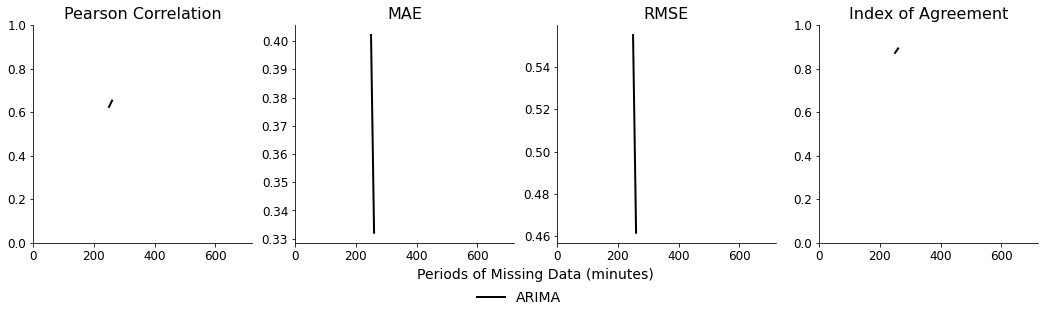

In [10]:
for param, order in zip(["temperature_c"],[(3,0,2)]):#,"co","tvoc","temperature_c"],[(3,0,3),(3,0,2),(3,0,3),(3,0,2)]):  #["co2"],[(2,0,3)]
    imp.set_arima_order(order)
    #[5,10,15,30,45,60,75,90,105,120,135,150,180,195,210,240,300,360,420,450,480,510,540,600,630,660,690,720]
    res = imp.find_max_period(start_time=datetime(2020,6,15),end_time=datetime(2020,7,15),param=param,methods=["ARIMA"],n_cv=5,
                              periods=[125,130],
                              verbose=True,save=True,plot=False)
    imp.compare_methods(res,xlim=[0,720],xlabel="Periods of Missing Data (minutes)",save=True,annot=f"{param}_max_periods")

In [3]:
data_import = process.preprocess()

hello


In [4]:
data_import.process(beacons=[11],start_time=datetime(2021,11,21),end_time=datetime(2021,11,23))

2021-11-22
             Timestamp         CO         CO2      NO2    PM_C_1    PM_C_10  \
0  2021-11-22 12:51:16  1388815.0  498.373489  1379.25  1.571302   3.975997   
1  2021-11-22 12:54:30  1387683.0  438.170553   734.00  2.299372   3.944142   
2  2021-11-22 12:55:16   207296.4  453.643135   668.60  2.329868  10.440415   
3  2021-11-22 12:56:17   104516.6  426.374512   549.20  1.948856   7.287395   
4  2021-11-22 12:57:16    74088.8  313.621704   487.40  1.538301   3.568608   

   PM_C_2p5     PM_C_4   PM_N_0p5     PM_N_1    PM_N_10   PM_N_2p5     PM_N_4  \
0  2.933760   3.893847   7.496359  10.936520  12.517953  12.320141  12.491757   
1  3.258592   3.890106  13.779490  17.393874  18.469009  18.337822  18.451394   
2  6.858905  10.158120   4.301703  12.845739  18.195447  17.518292  18.106359   
3  4.939232   7.102312   5.765505  11.817123  15.336200  14.891877  15.277663   
4  2.693360   3.499621   7.824477  10.947022  12.281112  12.114808  12.259047   

   RH_CO  RH_NO2  Relative 

In [5]:
data_import.save_data(annot="sam")